In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import os
import tensorflow as tf

2025-06-24 06:18:20.987847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750771101.115871 1764349 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750771101.154241 1764349 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750771101.451788 1764349 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750771101.451844 1764349 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750771101.451846 1764349 computation_placer.cc:177] computation placer alr

In [3]:
# minorized reference
with h5py.File('/global/u2/k/kberard/SCGSR/Research/Diamond/Data/density_tot_ref.h5', 'r') as file:
    #print("Keys: %s" % file.keys())
    ref_d = file['density'][:]
#print(ref_d)
print(ref_d.shape)




(64, 64, 64)


In [4]:
####################################################################################################################################################
def stochastic_density(d,N):
    # poisson model
    #  accurate and fast for all values of N
    # N  = number of MC samples
    assert isinstance(d,np.ndarray)
    assert isinstance(N,(int,float,np.int64,np.float64))
    assert N>0
    ds = np.random.poisson(N*d)/N
    ds*= d.sum()/ds.sum()
    return ds
#end def stochastic_density

####################################################################################################################################################

In [5]:
print(ref_d.shape)
"""y_train_3d = np.zeros((5000,64,64,64))
for i in range (len(y_train_3d)):
    y_train_3d[i] =  stochastic_density(ref_d,4770000)
y_train = (np.sum(y_train_3d,axis=2))"""

x_train_3d = np.zeros((1000,64,64,64))
for i in range (int(len(x_train_3d)/5)):
    for j in range (5):     
        x_train_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))

print("train generated")

(64, 64, 64)
train generated


In [6]:
print(ref_d.shape)
"""y_val_3d = np.zeros((1000,64,64,64))
for i in range (len(y_val_3d)):
    y_val_3d[i] =  stochastic_density(ref_d,4770000)
y_val = (np.sum(y_val_3d,axis=2))"""

x_val_3d = np.zeros((500,64,64,64))
for i in range (int(len(x_val_3d)/5)):
    for j in range (5):     
        x_val_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))

print("val generated")

(64, 64, 64)
val generated


In [7]:
#################  add more diverse set of training data and fix overfilling!!!!!!!!!!

In [8]:
print(ref_d.shape)
"""y_test_3d = np.zeros((500,64,64,64))
for i in range (len(y_test_3d)):
    y_test_3d[i] =  stochastic_density(ref_d,4770000)
y_test = (np.sum(y_test_3d,axis=2))"""
count = 0
x_test_3d = np.zeros((100,64,64,64))
for i in range (int(len(x_test_3d)/5)):
    for j in range (5):   
        count+=1
        x_test_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))

print("test generated")
print(count)

(64, 64, 64)
test generated
100


In [9]:
################## Test what number of samples #####################
"""y_tvt = stochastic_density(ref_d,4770000)
print(y_tvt.shape)
print("target error is =",np.linalg.norm(ref_d-tot_VMC_d[1]))
print("current error is =",np.linalg.norm(ref_d-y_tvt[1]))"""

'y_tvt = stochastic_density(ref_d,4770000)\nprint(y_tvt.shape)\nprint("target error is =",np.linalg.norm(ref_d-tot_VMC_d[1]))\nprint("current error is =",np.linalg.norm(ref_d-y_tvt[1]))'

In [10]:
y_test_3d = np.zeros((x_test_3d.shape[0],64,64,64))
y_train_3d = np.zeros((x_train_3d.shape[0],64,64,64))
y_val_3d = np.zeros((x_val_3d.shape[0],64,64,64))
for i in range (y_test_3d.shape[0]):
    y_test_3d[i]=stochastic_density(ref_d,1000000)


for i in range (y_train_3d.shape[0]):
    y_train_3d[i]=stochastic_density(ref_d,1000000)


for i in range (y_val_3d.shape[0]):
    y_val_3d[i]=stochastic_density(ref_d,1000000)

print("here")

here


In [10]:
"""y_test = np.zeros((x_test.shape))
y_train = np.zeros((x_train.shape))
y_val = np.zeros((x_val.shape))
for i in range (y_test.shape[0]):
    y_test[i]=minorized_ref_d

for i in range (y_train.shape[0]):
    y_train[i]=minorized_ref_d

for i in range (y_val.shape[0]):
    y_val[i]=minorized_ref_d"""

'y_test = np.zeros((x_test.shape))\ny_train = np.zeros((x_train.shape))\ny_val = np.zeros((x_val.shape))\nfor i in range (y_test.shape[0]):\n    y_test[i]=minorized_ref_d\n\nfor i in range (y_train.shape[0]):\n    y_train[i]=minorized_ref_d\n\nfor i in range (y_val.shape[0]):\n    y_val[i]=minorized_ref_d'

In [11]:
# Add channel dimension
x_train = x_train_3d[..., np.newaxis]
x_val   = x_val_3d[..., np.newaxis]
x_test  = x_test_3d[..., np.newaxis]

y_train = y_train_3d[..., np.newaxis]
y_val   = y_val_3d[..., np.newaxis]
y_test   = y_test_3d[..., np.newaxis]

In [12]:
import tensorflow as tf

def jensen_shannon_divergence_loss(y_true, y_pred):
    # Ensure float32 for precision
    y_t = tf.cast(y_true, tf.float32)
    y_p = tf.cast(y_pred, tf.float32)

    # Flatten to (batch_size, num_voxels)
    y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
    y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])

    # Normalize to make probability distributions per sample
    y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
    y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8

    # Midpoint distribution
    m = 0.5 * (y_t + y_p)

    # Per-sample KL divergences
    kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)  # shape: [batch_size]
    kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)  # shape: [batch_size]

    # Jensen-Shannon divergence per sample
    jsd = 0.5 * (kl_true + kl_pred)  # shape: [batch_size]

    # Final scalar loss
    return tf.reduce_mean(jsd)


In [ ]:
# requires too much memore need to run beyond 1 node
"""import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

# --- JS Divergence Loss ---
def jensen_shannon_divergence_loss(y_true, y_pred):
    m = 0.5 * (y_true + y_pred)
    return 0.5 * tf.keras.losses.KLD(y_true, m) + 0.5 * tf.keras.losses.KLD(y_pred, m)

# --- DAE Definition ---
def create_dae(input_shape):
    def renormalize(x):
        x_sum = tf.reduce_sum(x, axis=[1, 2, 3, 4], keepdims=True)
        return x / (x_sum + 1e-8) * 8.0
    
    flat_dim = np.prod(input_shape)
    
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        
        # Encoder
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),

        # Decoder
        layers.Dense(128, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(flat_dim, activation='sigmoid'),
        layers.Reshape(target_shape=input_shape),
        layers.Lambda(renormalize)
    ])
    return model

# --- Main Execution ---
if __name__ == '__main__':
    input_shape = (64, 64, 64, 1)
    


    dae = create_dae(input_shape)
    dae.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss=jensen_shannon_divergence_loss)

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    dae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=100,
            batch_size=2,
            callbacks=[early_stop],
            verbose=1)

    # --- Predict and Evaluate ---
    denoised = dae.predict(x_test)[0, ..., 0]
    noisy_input = x_test[0, ..., 0]
    clean_target = y_test[0, ..., 0]

    # --- Plot: show middle slice ---
    middle_slice = input_shape[2] // 2

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(noisy_input[:, :, middle_slice], cmap='viridis')
    plt.title("Noisy Input (mid z)")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised[:, :, middle_slice], cmap='viridis')
    plt.title("Denoised Output (mid z)")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(clean_target[:, :, middle_slice], cmap='viridis')
    plt.title("Clean Target (mid z)")
    plt.colorbar()

    plt.tight_layout()
    plt.show()"""


Epoch 1/100


I0000 00:00:1750700344.411614 1725854 service.cc:152] XLA service 0x7f4bac003080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750700344.411657 1725854 service.cc:160]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
2025-06-23 10:39:04.647386: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750700344.913814 1725854 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-23 10:39:08.514422: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_301', 3312 bytes spill stores, 3296 bytes spill loads

2025-06-23 10:39:08.552155: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_301'

  5/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3.0665e-06   

I0000 00:00:1750700351.083018 1725854 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 3.0657e-06 - val_loss: 3.0656e-06
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 3.0656e-06 - val_loss: 3.0655e-06
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3.0655e-06 - val_loss: 3.0655e-06
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3.0655e-06 - val_loss: 3.0655e-06
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3.0654e-06 - val_loss: 3.0655e-06
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3.0655e-06 - val_loss: 3.0655e-06
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 3.0655e-06 - val_loss: 3.0655e-06
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3.0656e-06 - val_loss: 3.0654e-06
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3.0655e-06 - val_loss: 3.0654e-06
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 3.0655e-06 - val_loss: 3.0654e-06
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/

In [15]:
# must beat the model predicting the average
"""test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(x_test[0,:,:,0]-minorized_ref_d))
print(x_test[0,:,:,0].shape)
print(minorized_ref_d.shape)"""

Mean vs DFT 2 norm diff
0.06097954424117294
prediction of one test sample vs DFT
0.012803535607136136
(64, 64)
(64, 64)


In [19]:
"""# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(dae.predict(x_test[0:0+1])[0,:,:,0]-ref_d))
print()

print("divergence difference")
mean_pred = dae.predict(np.mean(x_test.copy(),axis=0).reshape(1,64,64,64,1))                 
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, ref_d.copy()))
print("JSD (DAE(bar{x}),y_dft):", jensen_shannon_divergence_loss(np.squeeze(mean_pred),ref_d.copy()))
print("JSD (DAE(_i}),y_dft):", jensen_shannon_divergence_loss(dae.predict(x_test[0:0+1])[0,:,:,0],ref_d.copy()))
"""



2 norm difference
Mean vs DFT 2 norm diff
296.5970382080674
prediction of one test sample vs DFT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
0.014024479062439955

divergence difference
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
JSD (bar{x_test},y_dft): tf.Tensor(
[[17.4537928  21.48587959 18.69598699 ... 10.41519753 13.70365175
  16.6919929 ]
 [ 3.94203958 17.94603447 20.42422353 ...  2.78371248 17.32085869
   7.69754717]
 [14.72680483  2.48678569  8.10958965 ...  8.7575475   8.8786571
   4.25919096]
 ...
 [ 8.29653561 16.140256   11.87797238 ...  6.4767906   8.56593438
  19.18914341]
 [14.97391252  9.68551976  7.74090589 ... 20.91884426 11.26419839
  13.83506785]
 [ 7.37545834  9.91277965  7.21095325 ... 18.58368987  2.44080832
   5.22619907]], shape=(64, 64), dtype=float64)
JSD (DAE(bar{x}),y_dft): tf.Tensor(
[[0.00018331 0.00020111 0.00022691 ... 0.00013707 0.00014686 0.00016631]
 [0.00020104 0.00022764 0.00026017 ... 0.00014883 0.00016081 0.00017969]
 [0.00022693 0.00026053 0.00029647 ... 0.0

In [ ]:
Need to figure out wierd lines in output

I0000 00:00:1750771971.704137 1764349 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 37062 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c3:00.0, compute capability: 8.0


Epoch 1/100


I0000 00:00:1750771980.231770 1813910 service.cc:152] XLA service 0x7f156402bbe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750771980.232387 1813910 service.cc:160]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
2025-06-24 06:33:00.536686: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750771980.871661 1813910 cuda_dnn.cc:529] Loaded cuDNN version 90300


 22/250 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1537

I0000 00:00:1750771986.251827 1813910 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.1054 - val_loss: 0.0795 - learning_rate: 1.0000e-04
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0806 - val_loss: 0.0857 - learning_rate: 1.0000e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0839 - val_loss: 0.0805 - learning_rate: 1.0000e-04
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0796 - val_loss: 0.0768 - learning_rate: 1.0000e-04
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0745 - val_loss: 0.0634 - learning_rate: 1.0000e-04
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0537 - val_loss: 0.0449 - learning_rate: 1.0000e-04
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0422 - val_loss: 0.0408 - learning_rate: 1.0000e-04
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0407 - val_loss: 0.0391 - learning_rate: 1.0000e-04
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0383 - val_loss: 0.

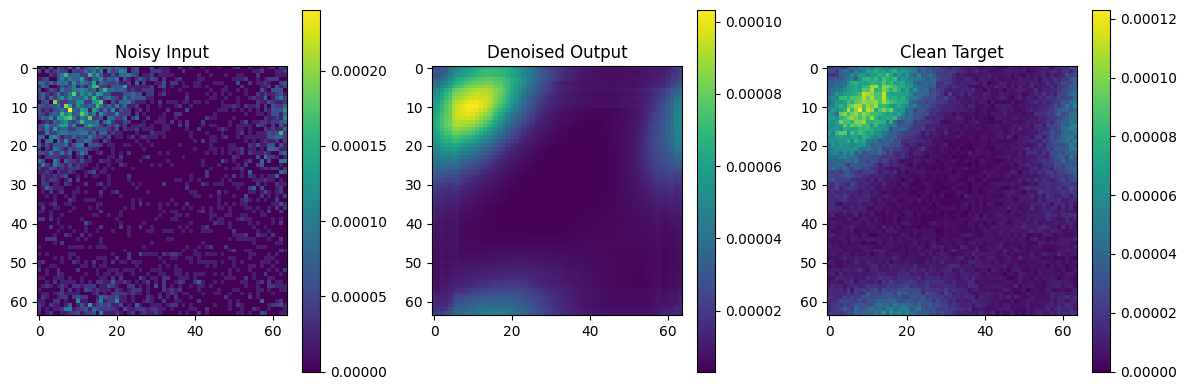

In [14]:
#Try learning rate scheduler
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
import matplotlib.pyplot as plt



def renormalize_sum_to_eight(x):
    total = tf.reduce_sum(x, axis=[1, 2, 3, 4], keepdims=True)
    return x / (total + 1e-8) * 8.0

# --- Jensen-Shannon Divergence Loss ---
def jensen_shannon_divergence_loss(y_true, y_pred):
    y_t = tf.cast(y_true, tf.float32)
    y_p = tf.cast(y_pred, tf.float32)

    y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
    y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])

    y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
    y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8

    m = 0.5 * (y_t + y_p)
    kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
    kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)
    return tf.reduce_mean(0.5 * (kl_true + kl_pred))

# --- 3D CAE Model Definition ---
def create_simple_3d_cae(input_shape=(64,64,64,1), dropout_rate=0.2, l2_strength=1e-4):
    reg = regularizers.l2(l2_strength)
    input_layer = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv3D(16, 3, activation='relu', padding='same', kernel_regularizer=reg)(input_layer)
    x = layers.MaxPooling3D(2)(x)
    x = layers.Conv3D(8, 3, activation='relu', padding='same', kernel_regularizer=reg)(x)
    x = layers.MaxPooling3D(2)(x)

    # Decoder
    x = layers.Conv3D(8, 3, activation='relu', padding='same', kernel_regularizer=reg)(x)
    x = layers.UpSampling3D(2)(x)
    x = layers.Conv3D(16, 3, activation='relu', padding='same', kernel_regularizer=reg)(x)
    x = layers.UpSampling3D(2)(x)

    # Final output layer
    x = layers.Conv3D(1, 3, activation='relu', padding='same', kernel_regularizer=reg)(x)

    # Normalize so sum == 8
    output_layer = layers.Lambda(lambda x: x / (tf.reduce_sum(x, axis=[1,2,3,4], keepdims=True) + 1e-8) * 8.0)(x)

    return models.Model(inputs=input_layer, outputs=output_layer)


# --- Training Pipeline ---
if __name__ == '__main__':
    # Assume x_train_3d, y_train_3d, etc. are already loaded
    # Add channel dim: (64,64,64) → (64,64,64,1)
    x_train = x_train_3d[..., np.newaxis]
    x_val   = x_val_3d[..., np.newaxis]
    x_test  = x_test_3d[..., np.newaxis]

    y_train = y_train_3d[..., np.newaxis]
    y_val   = y_val_3d[..., np.newaxis]
    y_test  = y_test_3d[..., np.newaxis]

    # Build and compile model
    input_shape = (64, 64, 64, 1)
    cae = create_simple_3d_cae(input_shape)
    cae.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=jensen_shannon_divergence_loss)

    # Callbacks
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-6
)
    callbacks_list = [early_stop, lr_scheduler]

    # Train
    cae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=100,
            batch_size=4,
            callbacks=callbacks_list,
            verbose=1)

    # Predict one test volume
    i = 0
    denoised = cae.predict(x_test[i:i+1])[0, ..., 0]
    noisy_input = x_test[i, ..., 0]
    true_clean = y_test[i, ..., 0]

    # Plot mid-slice
    z_mid = 64 // 2
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(noisy_input[:, :, z_mid], cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised[:, :, z_mid], cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(true_clean[:, :, z_mid], cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


In [15]:

# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(cae.predict(x_test[0:0+1])[0,:,:,:,0]-ref_d))
print()

print("divergence difference")
mean_pred = cae.predict(np.mean(x_test.copy(),axis=0).reshape(1,64,64,64,1))                 
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, ref_d.copy()))
print("JSD (DAE(bar{x}),y_dft):", jensen_shannon_divergence_loss(np.squeeze(mean_pred), ref_d.copy()))
print("JSD (DAE(_i}),y_dft):", jensen_shannon_divergence_loss(cae.predict(x_test[0:0+1])[0,:,:,:,0], ref_d.copy()))


print("not working bettterrr!!!!!!!!")

2 norm difference
Mean vs DFT 2 norm diff
0.00855391053740544
prediction of one test sample vs DFT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
0.0017431925325493544

divergence difference
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
JSD (bar{x_test},y_dft): tf.Tensor(0.0044082827, shape=(), dtype=float32)
JSD (DAE(bar{x}),y_dft): tf.Tensor(0.0032461374, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
JSD (DAE(_i}),y_dft): tf.Tensor(0.0010308158, shape=(), dtype=float32)
not working bettterrr!!!!!!!!


In [16]:
cae.predict(x_test[0:0+1])[0,1,1,1,0],ref_d[1,1,1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


(np.float32(6.555208e-05), np.float64(6.52345762e-05))

In [22]:
a = .82
x_m = np.squeeze(np.mean(x_test.copy(),axis=0))
print(x_m.shape)
print(ref_d.shape)
print("mean:", jensen_shannon_divergence_loss(a*x_m+(1-a)*ref_d, ref_d.copy()))
#print("mean:", jensen_shannon_divergence_loss((1-a)*np.mean(x_test.copy(),axis=0)+a*y_dft[0].copy(), y_dft[0].copy()))
print(1/a**2)

(64, 64, 64)
(64, 64, 64)
mean: tf.Tensor(0.0023187122, shape=(), dtype=float32)
1.4872099940511603


In [23]:
#check the number of electrons
# need to ensure this is kept true throught taining
print("number of electron is should = 8",np.sum(denoised.sum(axis=1)))


number of electron is should = 8 8.0
